# Imports

In [24]:
import os
import json
import re
import math
import numpy as np
import matplotlib.pyplot as plt
from string import punctuation
from hazm import Normalizer, word_tokenize, stopwords_list, Stemmer
import copy
import collections

# Read data

In [2]:
with open("IR_data_news_12k.json") as f:
    docs = json.load(f)

In [3]:
docs['0']

{'title': 'اعلام زمان قرعه کشی جام باشگاه های فوتسال آسیا',
 'content': '\nبه گزارش خبرگزاری فارس، کنفدراسیون فوتبال آسیا (AFC) در نامه ای رسمی به فدراسیون فوتبال ایران و باشگاه گیتی پسند زمان\xa0 قرعه کشی جام باشگاه های فوتسال آسیا را رسماً اعلام کرد. بر این اساس 25 فروردین ماه 1401 مراسم قرعه کشی جام باشگاه های فوتسال آسیا در مالزی برگزار می شود. باشگاه گیتی پسند بعنوان قهرمان فوتسال ایران در سال 1400 به این مسابقات راه پیدا کرده است. پیش از این گیتی پسند تجربه 3 دوره حضور در جام باشگاه های فوتسال آسیا را داشته که هر سه دوره به فینال مسابقات راه پیدا کرده و یک عنوان قهرمانی و دو مقام دومی بدست آورده است. انتهای پیام/\n\n\n',
 'tags': ['اعلام زمان',
  'قرعه\u200cکشی',
  'قرعه\u200cکشی جام',
  'قرعه\u200cکشی جام باشگاه\u200cهای فوتسال',
  'ای اف سی',
  'گیتی پسند'],
 'date': '3/15/2022 5:59:27 PM',
 'url': 'https://www.farsnews.ir/news/14001224001005/اعلام-زمان-قرعه-کشی-جام-باشگاه-های-فوتسال-آسیا',
 'category': 'sports'}

# Phase 1

## Preprocess 

In [4]:
def preprocess_text(content, stemming=True, stop_words=True):
    """ preprocess text """
    # Removing punctuations
    content = re.sub(f'[{punctuation}؟،٪×÷»«]+', '', content)

    # Normalizing
    content = Normalizer().normalize(content)

    # Stemming
    if (stemming):
        content = Stemmer().stem(content)

    # Tokenizing
    content = word_tokenize(content)

    # Remove stopwords
    if (stop_words):
        content = [w for w in content if w not in stopwords_list()]
    
    return content

In [5]:
def preprocess(input_docs, stemming=True, stop_words=True):
    """ preprocess all docs """
    
    docs = copy.deepcopy(input_docs)
    for doc_id in docs:            
        content = docs[doc_id]['content']
        docs[doc_id]['content'] = preprocess_text(content, stemming, stop_words)
        if (int(doc_id) % 1000 == 0):
            print(doc_id)
    return docs

In [ ]:
# run first time
pre_processed_docs = preprocess(docs)
with open("IR_data_news_12k_preprocessed.json", 'w') as f:
     json.dump(pre_processed_docs, f)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000


In [6]:
# run second time
with open("IR_data_news_12k_preprocessed.json", 'r') as f:
    pre_processed_docs = json.load(f)

## Preprocess Tests

In [8]:
content = 'به گزارش خبرگزاری فارس، کنفدراسیون فوتبال آسیا (AFC) در نامه ای رسمی به فدراسیون فوتبال ایران و باشگاه گیتی پسند زمان  قرعه کشی جام باشگاه های فوتسال آسیا را رسماً اعلام کرد.'

In [10]:
removed_punc = re.sub(f'[{punctuation}؟،٪×÷»«]+', '', content)
removed_punc

'به گزارش خبرگزاری فارس کنفدراسیون فوتبال آسیا AFC در نامه ای رسمی به فدراسیون فوتبال ایران و باشگاه گیتی پسند زمان  قرعه کشی جام باشگاه های فوتسال آسیا را رسماً اعلام کرد'

In [13]:
normalized = Normalizer().normalize(removed_punc)
normalized

'به گزارش خبرگزاری فارس کنفدراسیون فوتبال آسیا AFC در نامه\u200cای رسمی به فدراسیون فوتبال ایران و باشگاه گیتی پسند زمان قرعه کشی جام باشگاه\u200cهای فوتسال آسیا را رسما اعلام کرد'

In [15]:
stemmed = Stemmer().stem(normalized)
stemmed

'به گزارش خبرگزاری فارس کنفدراسیون فوتبال آسیا AFC در نامه\u200cای رسمی به فدراسیون فوتبال ایران و باشگاه گیتی پسند زمان قرعه کشی جام باشگاه\u200cهای فوتسال آسیا را رسما اعلام کرد'

In [107]:
tokenized = word_tokenize(stemmed)
print(tokenized)

['به', 'گزارش', 'خبرگزاری', 'فارس', 'کنفدراسیون', 'فوتبال', 'آسیا', 'AFC', 'در', 'نامه\u200cای', 'رسمی', 'به', 'فدراسیون', 'فوتبال', 'ایران', 'و', 'باشگاه', 'گیتی', 'پسند', 'زمان', 'قرعه', 'کشی', 'جام', 'باشگاه\u200cهای', 'فوتسال', 'آسیا', 'را', 'رسما', 'اعلام', 'کرد']


In [110]:
stop_words_removed = [w for w in tokenized if w not in stopwords_list()]
print(stop_words_removed)

['گزارش', 'خبرگزاری', 'فارس', 'کنفدراسیون', 'فوتبال', 'آسیا', 'AFC', 'نامه\u200cای', 'رسمی', 'فدراسیون', 'فوتبال', 'ایران', 'باشگاه', 'گیتی', 'پسند', 'زمان', 'قرعه', 'کشی', 'جام', 'باشگاه\u200cهای', 'فوتسال', 'آسیا', 'رسما', 'اعلام']


## Stemming Problems

In [22]:
Stemmer().stem('ایران')

'ایر'

In [21]:
Stemmer().stem('مبارزات')

'مبارز'

In [20]:
Stemmer().stem('بهره برداری')

'بهره بردار'

# Indexing

In [9]:
# indexing formt
"""
index = {term:
             total_freq:
             docs: {
                   doc_id_1: {
                       count_of_word:
                       positions: {}
                       }
                   ,
                   doc_id_2: {
                       count_of_word:
                       positions: {}
                       }
                   ,
                   . . .
                   }
        }
"""

'\nindex = {term:\n             total_freq:\n             docs: {\n                   doc_id_1: {\n                       count_of_word:\n                       positions: {}\n                       }\n                   ,\n                   doc_id_2: {\n                       count_of_word:\n                       positions: {}\n                       }\n                   ,\n                   . . .\n                   }\n        }\n'

In [7]:
def create_index_dict(docs):
    
    index = {}
    for doc_id in docs:    
        for pos, token in enumerate(docs[doc_id]['content']):
            if token not in index:
                index[token] = {
                'total_freq': 1,
                 'docs': {
                       doc_id: {
                           'count_of_word': 1,
                           'positions': [pos]
                           }
                    }
                }
            else:
                index[token]['total_freq'] += 1  
                if doc_id not in index[token]['docs']:
                    index[token]['docs'][doc_id] = {}
                    index[token]['docs'][doc_id]['count_of_word'] = 1
                    index[token]['docs'][doc_id]['positions'] = [pos]
                else:
                    index[token]['docs'][doc_id]['count_of_word'] += 1 
                    index[token]['docs'][doc_id]['positions'].append(pos)   
    
    # create champion lists             
    for word in index:
        champ_list = sorted(index[word]['docs'], key=lambda x: index[word]['docs'][x]['count_of_word'], reverse=True)
        index[word]['champions'] = champ_list[:len(champ_list) // 5]
    return index

In [137]:
# run first time
index = create_index_dict(pre_processed_docs)
with open("index.json", 'w') as f:
    docs = json.dump(index, f)

In [8]:
# run second time
with open("index.json", 'r') as f:
    index = json.load(f)

# Query processing

In [10]:
def simple_process(docs, tokens):
    docs_score = {}
    for token in tokens:
        if token in index:
            for doc_id in index[token]['docs']:
                    if doc_id not in docs_score.keys():
                        docs_score[doc_id] = 1
                    else:
                        docs_score[doc_id] += 1
   
    docs_score = sorted(docs_score.items(), key=lambda doc_score: doc_score[1], reverse=True)
    result = [x for x,_ in docs_score]
    return result

In [11]:
def exceptions_process(docs, tokens):
    removal_docs = []
    for token in tokens:
        rmv_docIds = index[token]['docs'].keys()
        for doc_id in rmv_docIds:  
             if removal_docs.count(doc_id) == 0:
                    removal_docs.append(doc_id)

    result = []            
    for doc_id in docs:
        if removal_docs.count(doc_id) == 0:
            result.append(doc_id)

    return result

In [12]:
def doc_contain_phrase(docId, phrase):
   # we need just a sequence of numbers in positions to find a doc contain special phrase",
    tokens_lst = phrase.split()
    positions = []
    for token in tokens_lst:
        positions.append(list(index[token]['docs'][docId]['positions']))

    for i in range (len(positions[0])):
        flag = True
        index_of_first_token = positions[0][i]
        for j in range (len(positions)):
            if positions[j].count(index_of_first_token + j) == 0:
                flag = False
        if flag :
            return True
    return flag

In [13]:
def phrasal_process(docs, phrases):
    posting_lists = []
    result = []
    for phrase in phrases:
        words = phrase.split()
        for word in words:
            if word in index:
                posting_lists.append(list(index[word]['docs'].keys()))
    
        intersection_doc_ids = set.intersection(*map(set, posting_lists))

        for docId in intersection_doc_ids:
            if doc_contain_phrase(docId, phrase):     
                result.append(docId)
    return result

In [28]:
def process_query(query):
    
    exception_tokens = re.findall(r'\!\s(\w+)', query)
    phrasal_tokens = re.findall(r'"([^"]*)"', query)
    raw_tokens = re.sub(r'\!\s\w+', '', query)
    raw_tokens = re.sub(r'"[^"]*"', '', raw_tokens)
    
    simple_tokens = preprocess_text(raw_tokens)
    print(exception_tokens, phrasal_tokens, raw_tokens)
    result = None
    # sorted documents by relevance after processing simple tokens\n",
    if len(simple_tokens) > 0:
        result = simple_process(pre_processed_docs, simple_tokens)
        
    # removing the items that included exception tokens, kind of post filter
    if len(exception_tokens) > 0:
        removed_result = exceptions_process(result, exception_tokens)
        if len(removed_result) > 0 and len(result) > 0:
            result = [x for x in result if x in removed_result]  
            
    # Intersect of results with those containing phrasal queries\n",
    if len(phrasal_tokens) > 0:
        phrasal_result = phrasal_process(pre_processed_docs, phrasal_tokens)
        
        if result is None or len(result) == 0:
            return phrasal_result
        result = [x for x in result if x in phrasal_result]  

    return result

In [15]:
def query_print(query, content=False, max_cnt=5):
    results = process_query(query)[:max_cnt]
    if len(results) == 0:
        print("نتیجه ای یافت نشد")
    for rank, doc in enumerate(results):
        if doc == None:
            continue
        print(50*'=')
        print(f'Rank: {rank + 1}, docID: {doc}')
        print(f'Title: {docs[f"{doc}"]["title"]}')
        print(f'URL: {docs[f"{doc}"]["url"]}')
        if content:
            print(f'{docs[f"{doc}"]["content"]}')

In [16]:
query_print('تحریم‌های آمریکا علیه ایران')

Rank: 1, docID: 6929
Title: توضیحات یک منبع آگاه درباره وقفه مذاکرات وین
URL: https://www.farsnews.ir/news/14001222000450/توضیحات-یک-منبع-آگاه-درباره-وقفه-مذاکرات-وین
Rank: 2, docID: 6963
Title: سیاست‌گذاری‌های ارزی دهه 90 همواره در جهت تضعیف ارزش پول ملی حرکت کرده‌ است
URL: https://www.farsnews.ir/news/14001221000788/سیاست‌گذاری‌های-ارزی-دهه-90-همواره-در-جهت-تضعیف-ارزش-پول-ملی-حرکت
Rank: 3, docID: 6996
Title: نشر خبر توقیف دو نفتکش ایرانی در این مقطع از مذاکرات، ترفند آمریکا برای امتیازگیری است
URL: https://www.farsnews.ir/news/14001220000571/نشر-خبر-توقیف-دو-نفتکش-ایرانی-در-این-مقطع-از-مذاکرات-ترفند-آمریکا-برای
Rank: 4, docID: 7049
Title: سخنگوی سپاه: پرتاب ماهواره «نور ۲» نماد پیروزی ملت ایران در جنگ تحریمی دشمنان است
URL: https://www.farsnews.ir/news/14001218000727/سخنگوی-سپاه-پرتاب-ماهواره-نور-۲-نماد-پیروزی-ملت-ایران-در-جنگ-تحریمی
Rank: 5, docID: 7059
Title: مذاکره‌کنندگان مراقب باشند تجربه تلخ برجام و بدعهدی‌های غرب تکرار نشود
URL: https://www.farsnews.ir/news/14001218000420/مذاک

In [17]:
query_print('تحریم‌های آمریکا ! ایران')

Rank: 1, docID: 7615
Title: یک مأموریت‌ فتنه 88 کاهش قدرت چانه‌زنی مسؤولان در مذاکرات بود
URL: https://www.farsnews.ir/news/14001129000373/یک-مأموریت‌-فتنه-کاهش-قدرت-چانه‌زنی-مسؤولان-در-مذاکرات-بود
Rank: 2, docID: 7627
Title: سران فتنه با ظلم‌شان در مشکلات اقتصادی امروز مردم شریک‌اند
URL: https://www.farsnews.ir/news/14001128000542/سران-فتنه-با-ظلم‌شان-در-مشکلات-اقتصادی-امروز-مردم-شریک‌اند
Rank: 3, docID: 9772
Title: غربی‌ها حقوق زنان را دستاویز مداخله در امور داخلی کشورها کرده‌اند/ تحقیر زن در غرب
URL: https://www.farsnews.ir/news/14000924000307/غربی‌ها-حقوق-زنان-را-دستاویز-مداخله-در-امور-داخلی-کشورها-کرده‌اند-
Rank: 4, docID: 9994
Title: امام جمعه موقت تهران: مذاکره کنونی با گذشته که نقد دادند و نسیه گرفتند، تفاوت دارد
URL: https://www.farsnews.ir/news/14000919000137/امام-جمعه-موقت-تهران-مذاکره-کنونی-با-گذشته-که-نقد-دادند-و-نسیه-گرفتند
Rank: 5, docID: 12154
Title: جمع‌بندی گزارش کمیسیون اصل 90 درباره قطعی برق نهایی شد/ کاهش میزان مشارکت بخش خصوصی در تولید و توزیع برق
URL: https://www

In [18]:
query_print('"تحریم هسته‌ای" آمریکا ! ایران')

نتیجه ای یافت نشد


In [19]:
query_print('اورشلیم ! صهیونیست')

نتیجه ای یافت نشد


In [31]:
query_print('لیگ برتر ! پرسپولیس')

['پرسپولیس'] [] لیگ برتر 
Rank: 1, docID: 1
Title: سجادی :حضور تماشاگران در  لیگ برتر فوتبال تابع نظر فدراسیون  و سازمان لیگ است
URL: https://www.farsnews.ir/news/14001224000982/سجادی-حضور-تماشاگران-در-لیگ-برتر-فوتبال-تابع-نظر-فدراسیون-و-سازمان
Rank: 2, docID: 4
Title: لیگ‌برتر بسکتبال|‌ نخستین پیروزی شهرداری گرگان و ذوب‌آهن در پلی‌آف
URL: https://www.farsnews.ir/news/14001224000947/لیگ‌برتر-بسکتبال|‌-نخستین-پیروزی-شهرداری-گرگان-و-ذوب‌آهن-در-پلی‌آف
Rank: 3, docID: 8
Title: مدیر بی‌دستاورد، رئیس شد/ روزگار تلخ‌تر از تلخ برای والیبال ارومیه؟
URL: https://www.farsnews.ir/news/14001224000811/مدیر-بی‌دستاورد-رئیس-شد-روزگار-تلخ‌تر-از-تلخ-برای-والیبال-ارومیه
Rank: 4, docID: 23
Title: مدافع پیکان جراحی کرد + عکس
URL: https://www.farsnews.ir/news/14001224000352/مدافع-پیکان-جراحی-کرد--عکس
Rank: 5, docID: 29
Title: مدیرعامل آلومینیوم: مرفاوی می‌داند هیچ باشگاهی با یک نفر صحبت نمی‌کند/استقلالی‌ها لیگ را گرفته‌اند
URL: https://www.farsnews.ir/news/14001224000282/مدیرعامل-آلومینیوم-مرفاوی-می‌داند-هی

# Zipf law

$$cf_i = cf_1 / i$$

In [158]:
def token_incidence(docs):
    dictionary = dict()
    for body in docs.values():
        for token in body['content']:
            if dictionary.get(token):
                dictionary[token] += 1
            else: 
                dictionary[token] = 1
    
    return dictionary

In [159]:
def draw_zipf_law(dictionary):
    """
    Draws the Zipf law.
    """
    all_tokens = list(dictionary.keys())
    counts_of_tokens = [dictionary[w] for w in all_tokens]
    ranks = np.arange(1, len(counts_of_tokens) + 1)
    sorted_counts_of_tokens = list(reversed(np.argsort(counts_of_tokens)))
    frequencies = [counts_of_tokens[i] for i in sorted_counts_of_tokens]
    
    plt.figure(figsize=(5, 4))
    plt.plot(ranks, frequencies)
    plt.plot([1, frequencies[0]], [frequencies[0], 1], color='g')
    plt.title("Zipf Graph")
    plt.xlabel("Frequency rank")
    plt.ylabel("Cf")
    plt.xscale('log')
    plt.yscale('log')
    
    plt.grid(True)
    plt.show()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000


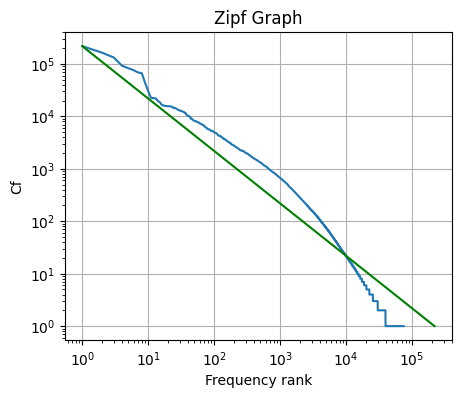

In [186]:
pre_processed_without_stop = preprocess(docs, stop_words=False)
draw_zipf_law(token_incidence(pre_processed_without_stop))

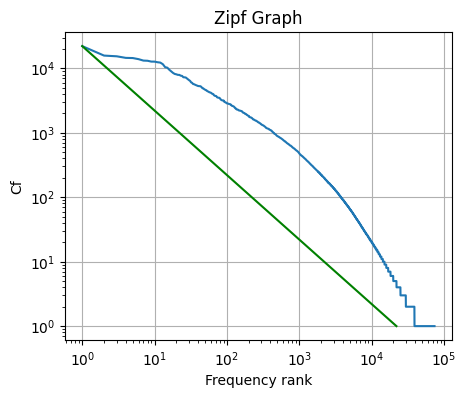

In [161]:
draw_zipf_law(token_incidence(pre_processed_docs))

# Heap law

$$ M = K * T ^ b$$

In [200]:
def token_heaps(docs):
    seen_docs = 0
    seen_token_cnt = 0
    vocab = set()
    vocab_size = []
    vocab_size_estimation = []
    seen_token_cnt_list = []
    for value in docs.values():
        if (seen_docs == 2001):
            break
        for token in value['content']:
            seen_token_cnt += 1
            vocab.add(token)
            vocab_size.append(len(vocab))
        seen_docs += 1
        if seen_docs in [500, 1000, 1500, 2000]:
            vocab_size_estimation.append(len(vocab))
            seen_token_cnt_list.append(seen_token_cnt)
    
    return vocab_size, vocab_size_estimation, seen_token_cnt_list

def draw_heaps_plot(docs):
    dictionary_size, dictionary_size_estimation, seen_token_cnt_list = token_heaps(docs)
    X = seen_token_cnt_list
    y = dictionary_size_estimation
    plt.figure(figsize=(5, 4))
    plt.xlabel('# of tokens')
    plt.ylabel('# of vocab')
    plt.plot(range(1, len(dictionary_size)+1), dictionary_size, label='actual')
    plt.plot(seen_token_cnt_list, dictionary_size_estimation, 'ro', label='Sampled points')
    k = 30
    b = 0.5
    plt.plot(range(1, len(dictionary_size)+1), k * np.power(list(range(1, len(dictionary_size)+1)), b), linestyle='--', color='g', label='expected')
    plt.xscale('log')
    plt.yscale('log')
    
    plt.legend()

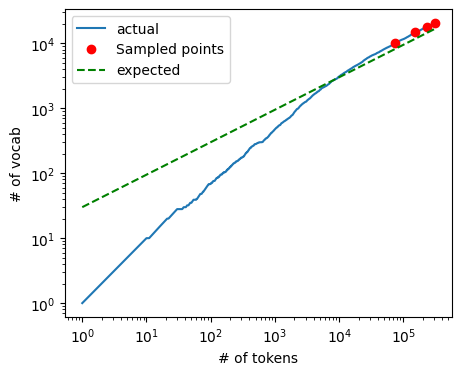

In [201]:
draw_heaps_plot(pre_processed_docs)

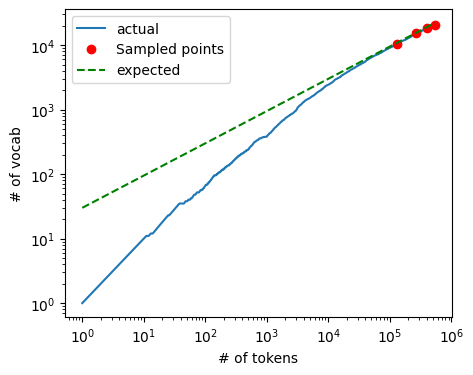

In [202]:
draw_heaps_plot(pre_processed_without_stop)

# Phase 2

## tf-idf

In [40]:
def get_tf_idf(tf, idf):
    """
    tf-idf of a term.
    """
    return (1 + (np.log10(tf))) * np.log10(idf)


def ranked_query(query, index, k, N, use_champion=False):
    """
    Returns the top k documents that are most similar to the query.
    """
    words = preprocess_text(query)
    query_index = dict(collections.Counter(words))  # inverted index for query

    scores = [0] * N

    for word in query_index:
        if word in index:
            docs = index[word]['docs']
            if use_champion:
                champions_list = index[word]['champions']
                docs = {doc_id: value for doc_id, value in docs.items() if doc_id in champions_list}
            idf = N / len(docs)
            wtq = get_tf_idf(query_index[word], idf) 
            for d in docs:
                wtd = get_tf_idf(docs[d]['count_of_word'], idf)
                scores[int(d)] += wtq * wtd 
    for d in range(len(scores)):
        scores[d] /= len(pre_processed_docs[str(d)]['content'])
                
    indices = np.argsort(scores)[::-1]
    return indices[:k]

In [41]:
def query_print(query, content=False, max_cnt=5, phase=1, use_champion=False):
    if phase == 1:
        results = process_query(query)[:max_cnt]
    else:
        results = ranked_query(query, index, max_cnt, len(docs), use_champion=use_champion)
    if len(results) == 0:
        print("نتیجه ای یافت نشد")
    for rank, doc in enumerate(results):
        print(50*'=')
        print(f'Rank: {rank + 1}, docID: {doc}')
        print(f'Title: {docs[f"{doc}"]["title"]}')
        print(f'URL: {docs[f"{doc}"]["url"]}')
        if content:
            print(f'{docs[f"{doc}"]["content"]}')

In [42]:
query_print('فوتبال', phase=2, use_champion=True)

Rank: 1, docID: 1523
Title: استیلی سرپرست تیم ملی فوتبال شد
URL: https://www.farsnews.ir/news/14001204000668/استیلی-سرپرست-تیم-ملی-فوتبال-شد
Rank: 2, docID: 1586
Title: ذوبی ها در آستانه دربی اصفهان شارژ شدند
URL: https://www.farsnews.ir/news/14001203000742/ذوبی-ها-در-آستانه-دربی-اصفهان-شارژ-شدند
Rank: 3, docID: 4840
Title: پاسخ عضو هیأت رئیسه به اختلاف سراجی با فدراسیون فوتبال
URL: https://www.farsnews.ir/news/14001022000548/پاسخ-عضو-هیأت-رئیسه-به-اختلاف-سراجی-با-فدراسیون-فوتبال
Rank: 4, docID: 1973
Title: دبیر کل در فدراسیون فوتبال ماندنی شد
URL: https://www.farsnews.ir/news/14001128000781/دبیر-کل-در-فدراسیون-فوتبال-ماندنی-شد
Rank: 5, docID: 137
Title: محرومیت 2 عضو فوتبال و فوتسال بانوان توسط کمیته اخلاق
URL: https://www.farsnews.ir/news/14001222000459/محرومیت-2-عضو-فوتبال-و-فوتسال-بانوان-توسط-کمیته-اخلاق


In [195]:
query_print('جدول رده‌بندی لیگ', phase=2)

Rank: 1, docID: 3583
Title: لیگ برتر والیبال| شگفتی‌سازی مسی‌ها و صعود خودروسازان/ صدر همچنان زرد است +جدول
URL: https://www.farsnews.ir/news/14001106000848/لیگ-برتر-والیبال|-شگفتی‌سازی-مسی‌ها-و-صعود-خودروسازان-صدر-همچنان-زرد
Rank: 2, docID: 5212
Title: لیگ برتر والیبال| نبرد نزدیک مدعیان در مثلث قدرت/ طلسم سپاهان شکسته می‌شود؟
URL: https://www.farsnews.ir/news/14001018000390/لیگ-برتر-والیبال|-نبرد-نزدیک-مدعیان-در-مثلث-قدرت-طلسم-سپاهان-شکسته
Rank: 3, docID: 5061
Title: لیگ برتر والیبال| شهداب روی نوار برد/درد سر عظیم برای سپاهان در روز شگفتی ها + جدول
URL: https://www.farsnews.ir/news/14001019000944/لیگ-برتر-والیبال|-شهداب-روی-نوار-برد-درد-سر-عظیم-برای-سپاهان-در-روز
Rank: 4, docID: 5683
Title: لیگ برتر والیبال| بازگشت هیجان به دنیای توپ و تور/ نبرد سخت بالانشینان و دربی خودروسازان
URL: https://www.farsnews.ir/news/14001011000265/لیگ-برتر-والیبال|-بازگشت-هیجان-به-دنیای-توپ-و-تور-نبرد-سخت-بالانشینان
Rank: 5, docID: 3023
Title: لیگ برتر والیبال| صعود 4 تیم قطعی شد/ امید 7 تیم به سه سهمیه 

In [196]:
query_print('استمهال', phase=2)

Rank: 1, docID: 11229
Title: وام کشاورزان استمهال شود
URL: https://www.farsnews.ir/news/14000819000217/وام-کشاورزان-استمهال-شود
Rank: 2, docID: 11475
Title: رئیسی: هیچ بانکی حق ندارد کارخانه‌ای را تعطیل کند
URL: https://www.farsnews.ir/news/14000813000661/رئیسی-هیچ-بانکی-حق-ندارد-کارخانه‌ای-را-تعطیل-کند
Rank: 3, docID: 8998
Title: گزارش سفر نمایندگان ویژه رئیس‌جمهور به مناطق سیل‌زده/بررسی خسارات و گفت‌وگو با مردم
URL: https://www.farsnews.ir/news/14001016000614/گزارش-سفر-نمایندگان-ویژه-رئیس‌جمهور-به-مناطق-سیل‌زده-بررسی-خسارات-و
Rank: 4, docID: 8413
Title: ۹۰ درصد مناطق سیل‌زده از شرایط اضطراری خارج شدند
URL: https://www.farsnews.ir/news/14001105000279/۹۰-درصد-مناطق-سیل‌زده-از-شرایط-اضطراری-خارج-شدند
Rank: 5, docID: 7587
Title: اعلام نظر شورای نگهبان درباره 16 طرح و لایحه
URL: https://www.farsnews.ir/news/14001130001158/اعلام-نظر-شورای-نگهبان-درباره-6-طرح-و-لایحه


In [197]:
query_print('طرح تسهیل مجوز', phase=2)

Rank: 1, docID: 8071
Title: طرح «تسهیل مجوزهای کسب‌‌وکار» ۴ماه است دست‌به‌دست می‌شود
URL: https://www.farsnews.ir/news/14001113000326/طرح-تسهیل-مجوزهای-کسب‌‌وکار-۴ماه-است-دست‌به‌دست-می‌شود
Rank: 2, docID: 7506
Title: کلیات طرح حمایت از کاربران فضای مجازی در کمیسیون ویژه تصویب شد
URL: https://www.farsnews.ir/news/14001203000680/کلیات-طرح-حمایت-از-کاربران-فضای-مجازی-در-کمیسیون-ویژه-تصویب-شد
Rank: 3, docID: 9164
Title: جزئیات طرح جدید مجلس برای سامان‌بخشی به بورس+ متن طرح
URL: https://www.farsnews.ir/news/14001011000203/جزئیات-طرح-جدید-مجلس-برای-سامان‌بخشی-به-بورس-متن-طرح
Rank: 4, docID: 7140
Title: برخورد با دستگاه‌هایی که به درگاه مجوزهای کسب و کار متصل نشده‌‌اند صورت گیرد
URL: https://www.farsnews.ir/news/14001216000609/برخورد-با-دستگاه‌هایی-که-به-درگاه-مجوزهای-کسب-و-کار-متصل-نشده‌‌اند
Rank: 5, docID: 10545
Title: ارجاع طرح صدور پروانه وکالت برای قضات بازنشسته به کمیسیون قضایی مجلس
URL: https://www.farsnews.ir/news/14000906000679/ارجاع-طرح-صدور-پروانه-وکالت-برای-قضات-بازنشسته-به-کمیسیو

In [198]:
query_print('استمهال', phase=1)

Rank: 1, docID: 7587
Title: اعلام نظر شورای نگهبان درباره 16 طرح و لایحه
URL: https://www.farsnews.ir/news/14001130001158/اعلام-نظر-شورای-نگهبان-درباره-6-طرح-و-لایحه
Rank: 2, docID: 8281
Title: در نشست نمایندگان استان‌های خوزستان، چهارمحال و لرستان با رئیسی چه گذشت؟
URL: https://www.farsnews.ir/news/14001108000291/در-نشست-نمایندگان-استان‌های-خوزستان-چهارمحال-و-لرستان-با-رئیسی-چه-گذشت
Rank: 3, docID: 8413
Title: ۹۰ درصد مناطق سیل‌زده از شرایط اضطراری خارج شدند
URL: https://www.farsnews.ir/news/14001105000279/۹۰-درصد-مناطق-سیل‌زده-از-شرایط-اضطراری-خارج-شدند
Rank: 4, docID: 8920
Title: اختصاصی| شورای نگهبان برای بررسی لایحه رتبه‌بندی معلمان از مجلس مهلت خواست/ طرح تسهیل مجوزهای کسب و کار رد شد
URL: https://www.farsnews.ir/news/14001019000650/اختصاصی|-شورای-نگهبان-برای-بررسی-لایحه-رتبه‌بندی-معلمان-از-مجلس-مهلت
Rank: 5, docID: 8998
Title: گزارش سفر نمایندگان ویژه رئیس‌جمهور به مناطق سیل‌زده/بررسی خسارات و گفت‌وگو با مردم
URL: https://www.farsnews.ir/news/14001016000614/گزارش-سفر-نمایندگان-و

In [199]:
query_print('طرح تسهیل مجوز', phase=1)

Rank: 1, docID: 6994
Title: گزارش سفر رئیس‌جمهور به مازندران| رئیسی: برای حمایت از دهک‌های پایین برنامه‌ ویژه‌ای داریم
URL: https://www.farsnews.ir/news/14001220000749/گزارش-سفر-رئیس‌جمهور-به-مازندران|-رئیسی-برای-حمایت-از-دهک‌های-پایین
Rank: 2, docID: 7109
Title: ۷۳ درصد ارز صادراتی در این 6 ماه به کشور بازگشته است
URL: https://www.farsnews.ir/news/14001217000267/۷۳-درصد-ارز-صادراتی-در-این-6-ماه-به-کشور-بازگشته-است
Rank: 3, docID: 7140
Title: برخورد با دستگاه‌هایی که به درگاه مجوزهای کسب و کار متصل نشده‌‌اند صورت گیرد
URL: https://www.farsnews.ir/news/14001216000609/برخورد-با-دستگاه‌هایی-که-به-درگاه-مجوزهای-کسب-و-کار-متصل-نشده‌‌اند
Rank: 4, docID: 7284
Title: گزارش مصوبات کمیسیون تلفیق درباره موارد ارجاعی لایحه بودجه ۱۴۰۱
URL: https://www.farsnews.ir/news/14001212000098/گزارش-مصوبات-کمیسیون-تلفیق-درباره-موارد-ارجاعی-لایحه-بودجه-۱۴۰۱
Rank: 5, docID: 7403
Title: نظرات شورای نگهبان درباره مصوبات مجلس شورای اسلامی
URL: https://www.farsnews.ir/news/14001207000436/نظرات-شورای-نگهبان-درباره-م

In [32]:
query_print('بیکاری جوانان لرستان', phase=2)

Rank: 1, docID: 9392
Title: نماینده مجلس: وزیر کار از پاسخگویی درباره اشتغال جوانان شانه خالی نکند
URL: https://www.farsnews.ir/news/14001007000051/نماینده-مجلس-وزیر-کار-از-پاسخگویی-درباره-اشتغال-جوانان-شانه-خالی-نکند
Rank: 2, docID: 10412
Title: امروز در مجلس چه گذشت/ بررسی کارنامه دولت قبل در اجرای طرح‌های اشتغال‌زایی
URL: https://www.farsnews.ir/news/14000909000584/امروز-در-مجلس-چه-گذشت-بررسی-کارنامه-دولت-قبل-در-اجرای-طرح‌های
Rank: 3, docID: 10442
Title: 27 هزار میلیارد تومان منابع قرض‌الحسنه نتوانست بیکاری را رفع کند
URL: https://www.farsnews.ir/news/14000909000200/2-هزار-میلیارد-تومان-منابع-قرض‌الحسنه-نتوانست-بیکاری-را-رفع-کند
Rank: 4, docID: 11727
Title: حسینی‌پور: امنیت روحی و روانی شهر با وجود هزاران جوان تحصیل کرده بیکار تامین نمی‌شود
URL: https://www.farsnews.ir/news/14000809000322/حسینی‌پور-امنیت-روحی-و-روانی-شهر-با-وجود-هزاران-جوان-تحصیل-کرده-بیکار
Rank: 5, docID: 7655
Title: ابلاغ سند ملی مهارت‌آموزی کارکنان وظیفه به استانداران
URL: https://www.farsnews.ir/news/14001127000

In [33]:
query_print('انرژی هسته ای سانتریفیوژ', phase=2)

Rank: 1, docID: 11864
Title: اهرم‌سازی از افغانستان در برجام/ نقطه عزیمت آمریکا در مذاکرات جامع با ایران چیست؟
URL: https://www.farsnews.ir/news/14000803000676/اهرم‌سازی-از-افغانستان-در-برجام-نقطه-عزیمت-آمریکا-در-مذاکرات-جامع-با
Rank: 2, docID: 9882
Title: چرا غرب مجبور به تمکین از خواسته‌ تهران است؟/ توان هسته‌ای؛ تنها یکی از ظرفیت‌های قدرت‌بخش ایران
URL: https://www.farsnews.ir/news/14000919000089/چرا-غرب-مجبور-به-تمکین-از-خواسته‌-تهران-است-توان-هسته‌ای-تنها-یکی-از
Rank: 3, docID: 9742
Title: مرکز پژوهش‌های مجلس: مذاکرات وین به توافقی زودهنگام منجر نمی‌شود
URL: https://www.farsnews.ir/news/14000924000773/مرکز-پژوهش‌های-مجلس-مذاکرات-وین-به-توافقی-زودهنگام-منجر-نمی‌شود
Rank: 4, docID: 7795
Title: انقلاب اسلامی؛ جهش علمی، نخبه‌پروری، تمدن اسلامی| هرجا مثل خودروسازی پول بر تعهد غلبه کرد عقب ماندیم
URL: https://www.farsnews.ir/news/14001116000704/انقلاب-اسلامی-جهش-علمی-نخبه‌پروری-تمدن-اسلامی|-هرجا-مثل-خودروسازی-پول
Rank: 5, docID: 7230
Title: رئیس دانشکده هسته‌ای دانشگاه شهید بهشتی: انرژی